<a href="https://colab.research.google.com/github/JotaBlanco/TheValley/blob/main/Advanced_ML_AI/Clase_02_Optimizacion_Modelos/02A_%7C_Notebook_Pr%C3%A1ctica_Ensamblaje_e_Hiperpar%C3%A1metros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01 INTRODUCCIÓN
En este Notebook trataremos dos ejercicios como modo de afianzar los conceptos sobre modelos de ensamblaje de modelos de árbol de decisión y métodos de búsqueda de hiperparámetros.


*   EJERCICIO COMPLICACIÓN QUIRÚRGICA
*   EJERCICIO CÍTRICOS


Notebook por [Javier Blanco Cordero](https://www.linkedin.com/in/javier-blanco-cordero-71373656/).

### Enlaces de interés
*   [Slides de presentación](https://docs.google.com/presentation/d/1Rzsrt7jqXUUyHNQMq20xaCfQw-YamYdZzYjfJPxZ12Y/edit?usp=sharing)
*   [Enlace a este notebook](https://colab.research.google.com/github/JotaBlanco/TheValley/blob/main/Advanced_ML_AI/Clase_02_Optimizacion_Modelos/02A_%7C_Notebook_Pr%C3%A1ctica_Ensamblaje_e_Hiperpar%C3%A1metros.ipynb#scrollTo=cnHRaho3rsXS)


## 0101 Import
Puedes importar aquí las librerías que creas que vas a necesitar.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import ensemble

## 0102 Carga el dataset de complicaciones quirúrgicas
Aquí teneis el url del archivo raw del dataset sobre si se da o no una complicación en una operación quirúrgica. 

https://raw.githubusercontent.com/JotaBlanco/TheValley/main/Data/complicacion_quirurgica.csv

Importa los datos en un dataframe llamado **dataframe df_operacion**.

In [ ]:
# Url archivo raw
url = 'https://raw.githubusercontent.com/JotaBlanco/TheValley/main/Data/complicacion_quirurgica.csv'

# Importa csv
df_operacion = pd.read_csv(url, sep=',')

# Visualización primeras filas
df_operacion.head()

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,baseline_psych,baseline_pulmonary,ahrq_ccs,ccsComplicationRate,ccsMort30Rate,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
0,19.31,59.2,1,1,0,0,0,0,0,0,0,0,19,0.183370,0.007424,-0.57,3,0,7.63,6,1,0,-0.43,1,0
1,18.73,59.1,0,0,0,0,0,0,0,0,0,0,1,0.312029,0.016673,0.21,0,0,12.93,0,1,0,-0.41,1,0
2,21.85,59.0,0,0,0,0,0,0,0,0,0,0,6,0.150706,0.001962,0.00,2,0,7.68,5,3,0,0.08,1,0
3,18.49,59.0,1,0,1,0,0,1,1,0,0,0,7,0.056166,0.000000,-0.65,2,1,7.58,4,3,0,-0.32,1,0
4,19.70,59.0,1,0,0,0,0,0,0,0,0,0,11,0.197305,0.002764,0.00,0,0,7.88,11,0,0,0.00,1,0


## 0103 Carga el dataset de naranja-pomelo
Aquí teneis el url del archivo raw del dataset que indica si una fruta es una naranja o un pomelo. 

https://raw.githubusercontent.com/JotaBlanco/TheValley/main/Data/citrus.csv

Importa los datos en un dataframe llamado **dataframe df**.

In [ ]:
# Url archivo raw
url = 'https://raw.githubusercontent.com/JotaBlanco/TheValley/main/Data/citrus.csv'

# Importa csv
df = pd.read_csv(url, sep=',')

# Visualización primeras filas
df.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [ ]:
df['name'].value_counts()

grapefruit    5000
orange        5000
Name: name, dtype: int64

# 02 EDA
Para familiarizarte con los datos puedes realizar un pequeño análisis exploratorio visual. Puedes usar los métodos .shape, .info(), .describe(), por ejemplo para entender su tamaño y sus variables. 

Recuerda que puedes encontrar mis clases sobre análisis exploratorio [aquí](https://github.com/JotaBlanco/TheValley/tree/main/EDA/).

## 0201 EDA OPERACIONES

In [ ]:
df_operacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14635 entries, 0 to 14634
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bmi                  14635 non-null  float64
 1   Age                  14635 non-null  float64
 2   asa_status           14635 non-null  int64  
 3   baseline_cancer      14635 non-null  int64  
 4   baseline_charlson    14635 non-null  int64  
 5   baseline_cvd         14635 non-null  int64  
 6   baseline_dementia    14635 non-null  int64  
 7   baseline_diabetes    14635 non-null  int64  
 8   baseline_digestive   14635 non-null  int64  
 9   baseline_osteoart    14635 non-null  int64  
 10  baseline_psych       14635 non-null  int64  
 11  baseline_pulmonary   14635 non-null  int64  
 12  ahrq_ccs             14635 non-null  int64  
 13  ccsComplicationRate  14635 non-null  float64
 14  ccsMort30Rate        14635 non-null  float64
 15  complication_rsi     14635 non-null 

In [ ]:
df_operacion.describe()

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,baseline_psych,baseline_pulmonary,ahrq_ccs,ccsComplicationRate,ccsMort30Rate,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
count,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000
mean,31.295642,63.205268,0.632320,0.262316,0.977520,0.620294,0.004851,0.120875,0.189546,0.342740,0.082405,0.094090,7.428493,0.133570,0.004447,-0.699044,1.606970,0.548890,10.171613,5.915408,1.187086,0.003963,-0.836712,0.919440,0.252135
std,8.152709,18.088191,0.539952,0.439909,1.758355,0.485330,0.069485,0.325993,0.391955,0.474642,0.274990,0.291963,6.949455,0.088402,0.004579,1.339394,1.497738,0.497621,2.659881,3.239825,1.158357,0.062830,1.194111,0.364663,0.434253
min,2.150000,6.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016118,0.000000,-4.720000,0.000000,0.000000,6.070000,0.000000,0.000000,0.000000,-3.820000,0.000000,0.000000
25%,26.510000,51.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.081977,0.001962,-1.970000,0.000000,0.000000,7.820000,3.000000,0.000000,0.000000,-2.250000,1.000000,0.000000
50%,28.980000,59.700000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.105720,0.002959,-0.580000,1.000000,1.000000,9.120000,7.000000,1.000000,0.000000,-0.640000,1.000000,0.000000
75%,35.295000,74.700000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,13.000000,0.183370,0.007398,0.000000,3.000000,1.000000,12.050000,8.000000,2.000000,0.000000,0.000000,1.000000,1.000000
max,92.590000,90.000000,2.000000,1.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000,0.466129,0.016673,12.560000,4.000000,1.000000,18.920000,11.000000,3.000000,1.000000,4.400000,2.000000,1.000000


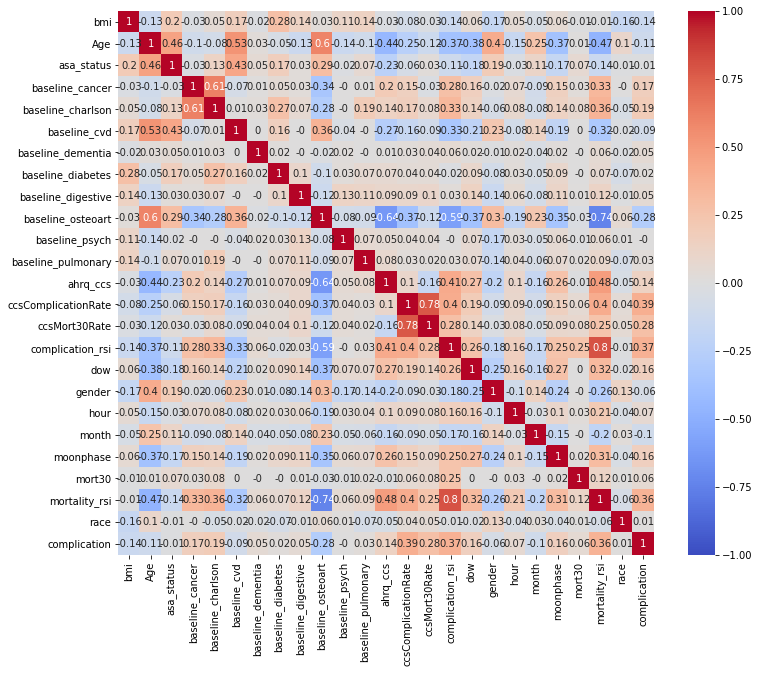

In [ ]:
# Visualización coeficientes Pearson
plt.figure(figsize=(12,10))
sns.heatmap(np.round(df_operacion.corr(),2), 
            vmin=-1, vmax=1, 
            annot=True, cmap="coolwarm")
plt.show()

## 0202 EDA CÍTRICOS

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [ ]:
df.describe()

,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200
std,1.947844,29.212119,10.432954,11.708433,9.061275
min,2.960000,86.760000,115.000000,31.000000,2.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000
75%,11.480000,197.722500,161.000000,84.000000,17.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000


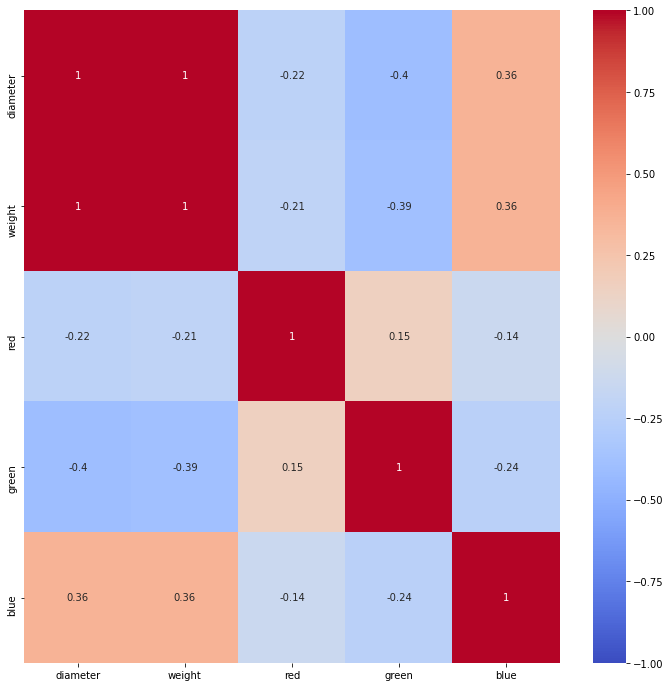

In [ ]:
# Visualización coeficientes Pearson
plt.figure(figsize=(12,12))
sns.heatmap(np.round(df.corr(),2), 
            vmin=-1, vmax=1, 
            annot=True, cmap="coolwarm")
plt.show()

# 03 Preparación de los datos
Normalmente el dataframe contiene nulos, así como variables categóricas y presencia de ciertas variables que probablemente no queramos usar. 

Necesitamos limpiarlo antes de poder entrenar los modelos.

##0301 DATASET CÍTRICOS: Preparación de los datos
En este caso tenemos ya presentes sólo variables útiles y no hay nulos. Aún así, hay trabajo que hacer:

### 030101 Dumificación de variables categóricas
El target en este caso!

In [ ]:
df.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [ ]:
df = pd.get_dummies(df, prefix_sep='_', drop_first=True, columns=['name'])

display(len(df))
df.head()

10000

,diameter,weight,red,green,blue,name_orange
0,2.96,86.76,172,85,2,1
1,3.91,88.05,166,78,3,1
2,4.42,95.17,156,81,2,1
3,4.47,95.60,163,81,4,1
4,4.48,95.76,161,72,9,1


### 030102 Train - test

In [ ]:
# Primero generamos la matriz X con las variables predictoras 
# y el vector y con la variable a predecir
X = df.drop('name_orange',axis=1)
y = df['name_orange']

# Comprueba sus tamaños
X.shape, y.shape

((10000, 5), (10000,))

In [ ]:
# Haz la partición train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42)

# Comprueba sus tamaños
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6700, 5), (3300, 5), (6700,), (3300,))

## 0302 Train - test dataset operaciones

In [ ]:
df_operacion.head(2)

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,baseline_psych,baseline_pulmonary,ahrq_ccs,ccsComplicationRate,ccsMort30Rate,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
0,19.31,59.2,1,1,0,0,0,0,0,0,0,0,19,0.183370,0.007424,-0.57,3,0,7.63,6,1,0,-0.43,1,0
1,18.73,59.1,0,0,0,0,0,0,0,0,0,0,1,0.312029,0.016673,0.21,0,0,12.93,0,1,0,-0.41,1,0


In [ ]:
# Primero generamos la matriz X con las variables predictoras 
# y el vector y con la variable a predecir
X_operacion = df_operacion.drop('complication',axis=1)
y_operacion = df_operacion['complication']

# Comprueba sus tamaños
X_operacion.shape, y_operacion.shape

((14635, 24), (14635,))

In [ ]:
# Haz la partición train-test
X_op_train, X_op_test, y_op_train, y_op_test = train_test_split(X_operacion, y_operacion, 
                                                                test_size=0.33, 
                                                                random_state=42)

# Comprueba sus tamaños
X_op_train.shape, X_op_test.shape, y_op_train.shape, y_op_test.shape

((9805, 24), (4830, 24), (9805,), (4830,))

# 04 Función evaluación de modelos


In [ ]:
# Inicializo un modelo (árbol de decisión)
modelo_1 = tree.DecisionTreeClassifier( 
    max_depth=3)

In [ ]:
# Entreno el árbol con el set de entrenamiento
modelo_1 = modelo_1.fit(X=X_op_train, y=y_op_train)

In [ ]:
# Ahora, ya entrenado, puedo visualizarlo
print(tree.export_text(modelo_1,
                       feature_names=list(X_op_train.columns)))

|--- ccsComplicationRate <= 0.09
|   |--- Age <= 89.60
|   |   |--- Age <= 75.05
|   |   |   |--- class: 0
|   |   |--- Age >  75.05
|   |   |   |--- class: 1
|   |--- Age >  89.60
|   |   |--- complication_rsi <= -1.18
|   |   |   |--- class: 0
|   |   |--- complication_rsi >  -1.18
|   |   |   |--- class: 1
|--- ccsComplicationRate >  0.09
|   |--- Age <= 75.05
|   |   |--- complication_rsi <= 0.27
|   |   |   |--- class: 0
|   |   |--- complication_rsi >  0.27
|   |   |   |--- class: 1
|   |--- Age >  75.05
|   |   |--- class: 1



In [ ]:
# Evaluamos el rendimiento del modelo
y_op_pred_train = modelo_1.predict(X_op_train)

# Calidad predicción train
ac_train = round(accuracy_score(y_op_train, y_op_pred_train), 4)
print('Precisión en set de entrenamiento :', ac_train)

Precisión en set de entrenamiento : 0.8153


In [ ]:
# Uso el árbol para predecir sobre el dataset de test
y_op_pred_test = modelo_1.predict(X_op_test)

# Calidad predicción test
ac_test = round(accuracy_score(y_op_test, y_op_pred_test), 4)
print('Precisión en set de test :', ac_test)

Precisión en set de test : 0.812


In [ ]:
# Degradación de la predicción
print('Degradación: ' + str(round((ac_train-ac_test)/ac_train*100,2)) + '%')

Degradación: 0.4%


## 0401 Función

In [ ]:
def entrenar_modelo_y_predecir(modelo, X_train, X_test, y_train, y_test):
  """
  Función que entrena un modelo ya inicializado y evalua su calidad en el set
  de entrenamiento y de test, indicando la degradación en este.
  """
  # Entreno el árbol con el set de entrenamiento
  modelo = modelo.fit(X=X_train, y=y_train)
  # Uso el árbol para predecir sobre el dataset de entrenamiento
  y_pred_train = modelo.predict(X_train)
  # Uso el árbol para predecir sobre el dataset de test
  y_pred_test = modelo.predict(X_test)
  # Calidad predicción train
  ac_train = round(accuracy_score(y_train, y_pred_train), 4)
  print('Precisión en set de entrenamiento :', ac_train)
  # Calidad predicción test
  ac_test = round(accuracy_score(y_test, y_pred_test), 4)
  print('Precisión en set de test :', ac_test)
  # Degradación de la predicción
  print('Degradación: ' + str(round((ac_train-ac_test)/ac_train*100,2)) + '%')  

In [ ]:
# Inicializo un modelo (árbol de decisión)
modelo_1 = tree.DecisionTreeClassifier( 
    max_depth=5)

entrenar_modelo_y_predecir(modelo_1, X_op_train, X_op_test, y_op_train, y_op_test)

Precisión en set de entrenamiento : 0.8264
Precisión en set de test : 0.8259
Degradación: 0.06%


# 05 Random Forest
Documentación sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

## 0501 OPERACIÓN

In [ ]:
# Define el modelo de Random Forest
modelo_RF_operacion = ensemble.RandomForestClassifier(
    n_estimators = 100)

# Entrena y evalúa el árbol
entrenar_modelo_y_predecir(modelo_RF_operacion, 
                           X_op_train, X_op_test, y_op_train, y_op_test)

Precisión en set de entrenamiento : 1.0
Precisión en set de test : 0.859
Degradación: 14.1%


In [ ]:
# Define el modelo de Random Forest
modelo_RF_operacion = ensemble.RandomForestClassifier(
    n_estimators = 100,
    max_features = "auto",
    min_samples_split = 10)

# Entrena y evalúa el árbol
entrenar_modelo_y_predecir(modelo_RF_operacion, 
                           X_op_train, X_op_test, y_op_train, y_op_test)

Precisión en set de entrenamiento : 0.9578
Precisión en set de test : 0.859
Degradación: 10.32%


In [ ]:
# Define el modelo de Random Forest
modelo_RF_operacion = ensemble.RandomForestClassifier(
    n_estimators = 100,
    max_features = "auto",
    min_samples_split = 35,
    min_samples_leaf = 3)

# Entrena y evalúa el árbol
entrenar_modelo_y_predecir(modelo_RF_operacion, 
                           X_op_train, X_op_test, y_op_train, y_op_test)

Precisión en set de entrenamiento : 0.8893
Precisión en set de test : 0.846
Degradación: 4.87%


## 0502 CÍTRICO

In [ ]:
# Define el modelo de Random Forest
modelo_RF_citrico = ensemble.RandomForestClassifier(
    n_estimators = 100)

# Entrena y evalúa el árbol
entrenar_modelo_y_predecir(modelo_RF_citrico, 
                           X_train, X_test, y_train, y_test)

Precisión en set de entrenamiento : 1.0
Precisión en set de test : 0.953
Degradación: 4.7%


In [ ]:
# Define el modelo de Random Forest
modelo_RF_citrico = ensemble.RandomForestClassifier(
    n_estimators = 100, 
    min_samples_split = 5)

# Entrena y evalúa el árbol
entrenar_modelo_y_predecir(modelo_RF_citrico, 
                           X_train, X_test, y_train, y_test)

Precisión en set de entrenamiento : 0.996
Precisión en set de test : 0.953
Degradación: 4.32%


# 06 Gradient Boosting
Documentación: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html.

## 0601 OPERACIÓN

In [ ]:
modelo_GB_operacion = ensemble.GradientBoostingClassifier(
    n_estimators = 100, 
    learning_rate = 0.1)

# Entrenamos y predecimos con dicho modelo
entrenar_modelo_y_predecir(modelo_GB_operacion, 
                           X_op_train, X_op_test, y_op_train, y_op_test) 

Precisión en set de entrenamiento : 0.9169
Precisión en set de test : 0.9099
Degradación: 0.76%


In [ ]:
modelo_GB_operacion = ensemble.GradientBoostingClassifier(
    n_estimators = 100,
    learning_rate = 0.1,
    max_depth = 7)

# Entrenamos y predecimos con dicho modelo
entrenar_modelo_y_predecir(modelo_GB_operacion, 
                           X_op_train, X_op_test, y_op_train, y_op_test) 

Precisión en set de entrenamiento : 0.9674
Precisión en set de test : 0.912
Degradación: 5.73%


## 0602 CÍTRICOS

In [ ]:
modelo_GB_citrico = ensemble.GradientBoostingClassifier(
    n_estimators = 100)

# Entrena y evalúa el árbol
entrenar_modelo_y_predecir(modelo_GB_citrico, 
                           X_train, X_test, y_train, y_test)

Precisión en set de entrenamiento : 0.9581
Precisión en set de test : 0.9445
Degradación: 1.42%


In [ ]:
modelo_GB_citrico = ensemble.GradientBoostingClassifier(
    n_estimators = 100,
    learning_rate = 0.1,
    max_depth = 7)

# Entrena y evalúa el árbol
entrenar_modelo_y_predecir(modelo_GB_citrico, 
                           X_train, X_test, y_train, y_test)

Precisión en set de entrenamiento : 0.999
Precisión en set de test : 0.9748
Degradación: 2.42%


# 07 ADABoost
Parámetros: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html

## 0701 OPERACIÓN

In [ ]:
modelo_ADA_operacion = ensemble.AdaBoostClassifier()

# Entrenamos y predecimos con dicho modelo
entrenar_modelo_y_predecir(modelo_ADA_operacion, 
                           X_op_train, X_op_test, y_op_train, y_op_test)

Precisión en set de entrenamiento : 0.893
Precisión en set de test : 0.8909
Degradación: 0.24%


In [ ]:
modelo_ADA_operacion = ensemble.AdaBoostClassifier(
    n_estimators=1000)

# Entrenamos y predecimos con dicho modelo
entrenar_modelo_y_predecir(modelo_ADA_operacion, 
                           X_op_train, X_op_test, y_op_train, y_op_test)

Precisión en set de entrenamiento : 0.9096
Precisión en set de test : 0.893
Degradación: 1.82%


## 0702 CÍTRICOS

In [ ]:
modelo_ADA_citrico = ensemble.AdaBoostClassifier()

# Entrena y evalúa el árbol
entrenar_modelo_y_predecir(modelo_ADA_citrico, 
                           X_train, X_test, y_train, y_test)

Precisión en set de entrenamiento : 0.9385
Precisión en set de test : 0.9352
Degradación: 0.35%


# 08 XGBoost
Definición de los parámetros: https://xgboost.readthedocs.io/en/latest/parameter.html.

In [ ]:
from xgboost import XGBClassifier

## 0801 OPERACIÓN

In [ ]:
modelo_XGB_operacion = XGBClassifier()

# Entrenamos y predecimos con dicho modelo
entrenar_modelo_y_predecir(modelo_XGB_operacion, 
                           X_op_train, X_op_test, y_op_train, y_op_test)

Precisión en set de entrenamiento : 0.915
Precisión en set de test : 0.9101
Degradación: 0.54%


In [ ]:
modelo_XGB_operacion = XGBClassifier(
    n_estimators = 200)

# Entrenamos y predecimos con dicho modelo
entrenar_modelo_y_predecir(modelo_XGB_operacion, 
                           X_op_train, X_op_test, y_op_train, y_op_test)

Precisión en set de entrenamiento : 0.921
Precisión en set de test : 0.9122
Degradación: 0.96%


In [ ]:
modelo_XGB_operacion = XGBClassifier(
    n_estimators = 200,
    max_depth = 6)

# Entrenamos y predecimos con dicho modelo
entrenar_modelo_y_predecir(modelo_XGB_operacion, 
                           X_op_train, X_op_test, y_op_train, y_op_test)

Precisión en set de entrenamiento : 0.9556
Precisión en set de test : 0.9106
Degradación: 4.71%


## 0802 CÍTRICOS

In [ ]:
# Menos overfitting y menos rendimiento
modelo_XGB_citrico = XGBClassifier()

# Entrena y evalúa el árbol
entrenar_modelo_y_predecir(modelo_XGB_citrico, 
                           X_train, X_test, y_train, y_test)

Precisión en set de entrenamiento : 0.9466
Precisión en set de test : 0.9373
Degradación: 0.98%


In [ ]:
# Más overfitting y más rendimiento
modelo_XGB_citrico = XGBClassifier(
    n_estimators=125,
    max_depth=4)

# Entrena y evalúa el árbol
entrenar_modelo_y_predecir(modelo_XGB_citrico, 
                           X_train, X_test, y_train, y_test)

Precisión en set de entrenamiento : 0.976
Precisión en set de test : 0.9636
Degradación: 1.27%


# 09 Stacking
Hay maneras de automatizar la creación de modelos con stacking. Por ahora no vamos a centrarnos en eso sino en la lógica detrás del stacking, por lo que realizaremos modelos de stacking a mano paso a paso.

- 1 Entrenar varios modelos de manera independiente (es lo que hemos venido haciendo en secciones anteriores)
- 2 Realizar predicciones con los distintos modelos
- 3 Entrenar un nuevo modelo que use las predicciones de los anteriores como variables

## 0901 OPERACIÓN

### 090101 Predicción con modelos anteriores

In [ ]:
diccionario_modelos = {
    'Random Forest': modelo_RF_operacion,
    'Gradient Boosting': modelo_GB_operacion,
    'ADABoost': modelo_ADA_operacion, 
    'XGBoost': modelo_XGB_operacion
} 

X_STACKING_train_operaciones = pd.DataFrame()
X_STACKING_test_operaciones = pd.DataFrame()

for modelo in diccionario_modelos.keys():
  print(modelo)
  X_STACKING_train_operaciones[modelo] = diccionario_modelos[modelo].predict(X_op_train) 
  X_STACKING_test_operaciones[modelo] = diccionario_modelos[modelo].predict(X_op_test) 

X_STACKING_train_operaciones.head()

Random Forest
Gradient Boosting
ADABoost
XGBoost


,Random Forest,Gradient Boosting,ADABoost,XGBoost
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


### 090102 Entrenamiento y predicción de metamodelo

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
metamodelo_operaciones = LogisticRegression()

# Entrenamos y predecimos con dicho modelo
entrenar_modelo_y_predecir(metamodelo_operaciones, 
                           X_STACKING_train_operaciones, X_STACKING_test_operaciones, y_op_train, y_op_test)

Precisión en set de entrenamiento : 0.9695
Precisión en set de test : 0.911
Degradación: 6.03%


In [ ]:
metamodelo_operaciones_arbol = tree.DecisionTreeClassifier(
    max_depth=5)

# Entrenamos y predecimos con dicho modelo
entrenar_modelo_y_predecir(metamodelo_operaciones_arbol, 
                           X_STACKING_train_operaciones, X_STACKING_test_operaciones, y_op_train, y_op_test)

Precisión en set de entrenamiento : 0.9697
Precisión en set de test : 0.9112
Degradación: 6.03%


In [ ]:
# Modelos individuales
for modelo in diccionario_modelos.keys():
  print(modelo)
  entrenar_modelo_y_predecir(diccionario_modelos[modelo], 
                             X_op_train, X_op_test, y_op_train, y_op_test)

Random Forest
Precisión en set de entrenamiento : 0.8936
Precisión en set de test : 0.8491
Degradación: 4.98%
Gradient Boosting
Precisión en set de entrenamiento : 0.9656
Precisión en set de test : 0.9099
Degradación: 5.77%
ADABoost
Precisión en set de entrenamiento : 0.9096
Precisión en set de test : 0.893
Degradación: 1.82%
XGBoost
Precisión en set de entrenamiento : 0.9556
Precisión en set de test : 0.9106
Degradación: 4.71%


In [ ]:
# Ahora, ya entrenado, puedo visualizarlo
print(tree.export_text(metamodelo_operaciones_arbol,
                       feature_names=list(X_STACKING_train_operaciones.columns)))

|--- Gradient Boosting <= 0.50
|   |--- XGBoost <= 0.50
|   |   |--- Random Forest <= 0.50
|   |   |   |--- ADABoost <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- ADABoost >  0.50
|   |   |   |   |--- class: 0
|   |   |--- Random Forest >  0.50
|   |   |   |--- ADABoost <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- ADABoost >  0.50
|   |   |   |   |--- class: 0
|   |--- XGBoost >  0.50
|   |   |--- ADABoost <= 0.50
|   |   |   |--- Random Forest <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- Random Forest >  0.50
|   |   |   |   |--- class: 1
|   |   |--- ADABoost >  0.50
|   |   |   |--- Random Forest <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- Random Forest >  0.50
|   |   |   |   |--- class: 0
|--- Gradient Boosting >  0.50
|   |--- XGBoost <= 0.50
|   |   |--- ADABoost <= 0.50
|   |   |   |--- class: 1
|   |   |--- ADABoost >  0.50
|   |   |   |--- Random Forest <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- Random Forest >  0.50
|   |  

## 0902 CÍTRICOS

### 090201 Predicción con modelos anteriores

In [ ]:
diccionario_modelos = {
    'Random Forest': modelo_RF_citrico,
    'Gradient Boosting': modelo_GB_citrico,
    'ADABoost': modelo_ADA_citrico, 
    'XGBoost': modelo_XGB_citrico
} 

X_STACKING_train_citrico = pd.DataFrame()
X_STACKING_test_citrico = pd.DataFrame()

for modelo in diccionario_modelos.keys():
  print(modelo)
  X_STACKING_train_citrico[modelo] = diccionario_modelos[modelo].predict(X_train) 
  X_STACKING_test_citrico[modelo] = diccionario_modelos[modelo].predict(X_test) 

X_STACKING_train_citrico.head()

Random Forest
Gradient Boosting
ADABoost
XGBoost


,Random Forest,Gradient Boosting,ADABoost,XGBoost
0,0,0,0,0
1,0,0,1,1
2,0,0,0,0
3,1,1,1,1
4,0,0,0,0


### 090202 Entrenamiento y predicción de metamodelo

In [ ]:
metamodelo_citrico = LogisticRegression()

# Entrenamos y predecimos con dicho modelo
entrenar_modelo_y_predecir(metamodelo_citrico, 
                           X_STACKING_train_citrico, X_STACKING_test_citrico, y_train, y_test)

Precisión en set de entrenamiento : 0.999
Precisión en set de test : 0.9748
Degradación: 2.42%


In [ ]:
metamodelo_citrico_arbol = tree.DecisionTreeClassifier()

# Entrenamos y predecimos con dicho modelo
entrenar_modelo_y_predecir(metamodelo_citrico_arbol, 
                           X_STACKING_train_citrico, X_STACKING_test_citrico, y_train, y_test)

Precisión en set de entrenamiento : 0.9993
Precisión en set de test : 0.9718
Degradación: 2.75%


In [ ]:
# Modelos individuales
for modelo in diccionario_modelos.keys():
  print(modelo)
  entrenar_modelo_y_predecir(diccionario_modelos[modelo], 
                             X_train, X_test, y_train, y_test)

Random Forest
Precisión en set de entrenamiento : 0.9961
Precisión en set de test : 0.953
Degradación: 4.33%
Gradient Boosting
Precisión en set de entrenamiento : 0.999
Precisión en set de test : 0.9748
Degradación: 2.42%
ADABoost
Precisión en set de entrenamiento : 0.9385
Precisión en set de test : 0.9352
Degradación: 0.35%
XGBoost
Precisión en set de entrenamiento : 0.976
Precisión en set de test : 0.9636
Degradación: 1.27%


In [ ]:
# Ahora, ya entrenado, puedo visualizarlo
print(tree.export_text(metamodelo_citrico_arbol,
                       feature_names=list(X_STACKING_train_citrico.columns)))

|--- Gradient Boosting <= 0.50
|   |--- Random Forest <= 0.50
|   |   |--- ADABoost <= 0.50
|   |   |   |--- XGBoost <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- XGBoost >  0.50
|   |   |   |   |--- class: 0
|   |   |--- ADABoost >  0.50
|   |   |   |--- class: 0
|   |--- Random Forest >  0.50
|   |   |--- ADABoost <= 0.50
|   |   |   |--- class: 1
|   |   |--- ADABoost >  0.50
|   |   |   |--- class: 0
|--- Gradient Boosting >  0.50
|   |--- class: 1



# 10 Selección automática de hiperparámetros

## 10.01 Grid Search
Documentación scklearn: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Diccionario con parámetros que queremos probar
parameters = {'n_estimators': [100, 200], 
              'min_samples_split': [5, 10, 20], 
              'max_depth': [5,20, None]}

# Se crea objeto GridSearch
RF_GSCV = GridSearchCV(
    estimator = ensemble.RandomForestClassifier(), 
    param_grid = parameters)

RF_GSCV

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [ ]:
# Se entrena el objeto GridSearch
RF_GSCV.fit(X_op_train, y_op_train)

RF_GSCV

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [ ]:
RF_GSCV.cv_results_

{'mean_fit_time': array([0.49253373, 0.95539761, 0.47854347, 0.96279759, 0.47872481,
        0.95753498, 0.97203417, 1.91963596, 0.92496748, 1.84739552,
        0.87218862, 1.74076996, 0.97380228, 1.95805559, 0.94004412,
        1.88584542, 0.88683805, 1.78881874]),
 'mean_score_time': array([0.02392864, 0.04619398, 0.0240963 , 0.04555364, 0.02493157,
        0.0485805 , 0.0421381 , 0.08199105, 0.04125013, 0.07853732,
        0.03823681, 0.07602015, 0.04343033, 0.08474422, 0.04169974,
        0.08032117, 0.03842416, 0.07600684]),
 'mean_test_score': array([0.82192759, 0.82264151, 0.82151963, 0.82049975, 0.82223355,
        0.82162162, 0.85986741, 0.85854156, 0.85925548, 0.85670576,
        0.8536461 , 0.85232024, 0.86047935, 0.86027537, 0.8563998 ,
        0.85792963, 0.85405405, 0.85537991]),
 'param_max_depth': masked_array(data=[5, 5, 5, 5, 5, 5, 20, 20, 20, 20, 20, 20, None, None,
                    None, None, None, None],
              mask=[False, False, False, False, False, Fa

In [ ]:
RF_GSCV.best_params_

{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}

## 10.02 EJEMPLO: Modelo Operaciones
Encuentra los mejores hiperparámetros posibles para el modelo de XGBoost que predice las complicaciones en una operación utilizando Grid Search: 

In [ ]:
modelo_GB_operacion = ensemble.GradientBoostingClassifier()

# Entrenamos y predecimos con dicho modelo
entrenar_modelo_y_predecir(modelo_GB_operacion, 
                           X_op_train, X_op_test, y_op_train, y_op_test) 

Precisión en set de entrenamiento : 0.9169
Precisión en set de test : 0.9097
Degradación: 0.79%


In [ ]:
# Diccionario con parámetros que queremos probar
parameters = {'n_estimators': [100, 200, 300], 
              'learning_rate': [0.3, 0.1], 
              'max_depth': [5,20], 
              'reg_alpha': [0, 1, 10]}

# Se crea objeto GridSearch
XGB_GSCV = GridSearchCV(
    estimator = XGBClassifier(), 
    param_grid = parameters)

XGB_GSCV

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.3, 0.1],
                         'max_depth': [5, 20, None],
                         'n_estimators': [100, 200, 300],
         

In [ ]:
# Se entrena el objeto GridSearch
XGB_GSCV.fit(X_op_train, y_op_train)

XGB_GSCV

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: Invalid Parameter format for max_depth expect int but value='None'

  FitFailedWarning)


In [ ]:
XGB_GSCV.cv_results_

## 10.03 EJERCICIO: Modelo Cítricos
Encuentra los mejores hiperparámetros posibles para el modelo de Gradient Boosting de cítricos: 

In [ ]:
modelo_GB_citrico = ensemble.GradientBoostingClassifier(
    n_estimators = 100)

# Entrena y evalúa el árbol
entrenar_modelo_y_predecir(modelo_GB_citrico, 
                           X_train, X_test, y_train, y_test)

In [ ]:
# Diccionario con parámetros que queremos probar
parameters = {'n_estimators': [100, 200, 300], 
              'learning_rate': [0.3, 0.1], 
              'max_depth': [5,10,20]}

# Se crea objeto GridSearch
GB_GSCV = GridSearchCV(
    estimator = ensemble.GradientBoostingClassifier(), 
    param_grid = parameters)

GB_GSCV